In [118]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import matplotlib.pyplot as plt
from keras import models,layers

In [119]:
def convert(data):
    for i in data.keys():
        print(i)
        number=preprocessing.LabelEncoder()
        if data[i].dtypes=='object':
            data[i]=number.fit_transform(data[i].astype(str))
            print(i)
            print('yes')
    data=data.fillna(-999)
    return data
    
def create_model():
    model=models.Sequential()
    model.add(layers.Dense(16,activation='relu',input_shape=(50,)))
    model.add(layers.Dense(16,activation='sigmoid'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [120]:
data=pd.read_csv('loan.csv')

data=data[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment',	
           'grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc'	,
           'verification_status','issue_d','loan_status','pymnt_plan','purpose',
           'title',	'zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths',	
           'mths_since_last_delinq','open_acc','pub_rec','revol_bal','revol_util',	
           'total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt',	
           'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',	
           'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d',	
           'last_credit_pull_d','collections_12_mths_ex_med','policy_code',	
           'application_type','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']]

dat=data
dat.loan_status=dat.loan_status.replace(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off',
             'Late (16-30 days)','Late (31-120 days)'],1)
dat.loan_status=dat.loan_status.replace(['Current','Does not meet the credit policy. Status:Fully Paid',
           'Fully Paid','In Grace Period','Issued'],0)

dat=dat.sample(frac=1)
fraud=dat[dat.loan_status==1]
not_fraud=dat[dat.loan_status==0][:len(fraud)]
new_data=pd.concat([fraud,not_fraud])
new_data=new_data.sample(frac=1,random_state=42)

y=new_data.loan_status
x=new_data.drop('loan_status',axis=1)
x=convert(x)


C:\Users\Anh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


loan_amnt
funded_amnt
funded_amnt_inv
term
term
yes
int_rate
installment
grade
grade
yes
sub_grade
sub_grade
yes
emp_title
emp_title
yes
emp_length
emp_length
yes
home_ownership
home_ownership
yes
annual_inc
verification_status
verification_status
yes
issue_d
issue_d
yes
pymnt_plan
pymnt_plan
yes
purpose
purpose
yes
title
title
yes
zip_code
zip_code
yes
addr_state
addr_state
yes
dti
delinq_2yrs
earliest_cr_line
earliest_cr_line
yes
inq_last_6mths
mths_since_last_delinq
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
initial_list_status
yes
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_d
yes
last_pymnt_amnt
next_pymnt_d
next_pymnt_d
yes
last_credit_pull_d
last_credit_pull_d
yes
collections_12_mths_ex_med
policy_code
application_type
application_type
yes
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

tree=DecisionTreeClassifier().fit(x_train,y_train)

tree_score=tree.score(x_test,y_test)
tree_auc=roc_auc_score(y_test,tree.predict(x_test))

false_positive, true_positive,_=roc_curve(y_test,tree.predict(x_test)) 
print(pd.crosstab(y_test,tree.predict(x_test),rownames=['True'],colnames=['Predicted'],margins=True))

Predicted      0      1    All
True                          
0          17219   1043  18262
1           1007  17437  18444
All        18226  18480  36706


In [122]:
lr=LogisticRegression().fit(x_train, y_train)
lr_score=lr.score(x_test,y_test)
lr_auc=roc_auc_score(y_test,lr.predict(x_test))
lrfalse_positive, lrtrue_positive,_=roc_curve(y_test,lr.predict(x_test)) 


In [123]:
model=create_model()
history=model.fit(x_train,y_train,epochs=40,batch_size=100,validation_data=(x_test,y_test))

Train on 85646 samples, validate on 36706 samples
Epoch 1/40
85646/85646 [==============================] - 3s 36us/step - loss: 0.7127 - acc: 0.5047 - val_loss: 0.6752 - val_acc: 0.5551
Epoch 2/40
85646/85646 [==============================] - 3s 32us/step - loss: 0.6615 - acc: 0.6032 - val_loss: 0.6566 - val_acc: 0.6106
Epoch 3/40
85646/85646 [==============================] - 2s 27us/step - loss: 0.6447 - acc: 0.6297 - val_loss: 0.6326 - val_acc: 0.6514
Epoch 4/40
85646/85646 [==============================] - 3s 31us/step - loss: 0.6311 - acc: 0.6430 - val_loss: 0.6228 - val_acc: 0.6548
Epoch 5/40
85646/85646 [==============================] - 2s 27us/step - loss: 0.6154 - acc: 0.6624 - val_loss: 0.5952 - val_acc: 0.6881
Epoch 6/40
85646/85646 [==============================] - 3s 34us/step - loss: 0.5920 - acc: 0.6912 - val_loss: 0.5931 - val_acc: 0.6833
Epoch 7/40
85646/85646 [==============================] - 2s 27us/step - loss: 0.5673 - acc: 0.7267 - val_loss: 0.5711 - val_acc

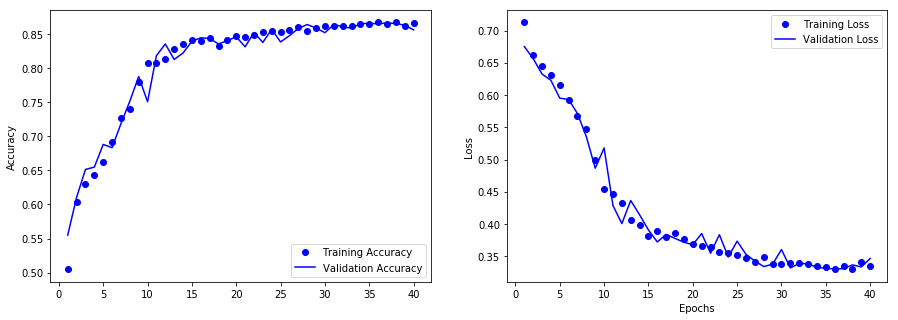

In [124]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [125]:
nn_prediction=model.predict(x_test)
print(nn_prediction)

[[0.18666354]
 [0.18666354]
 [0.18666354]
 ...
 [0.9972451 ]
 [0.18666354]
 [0.18666354]]


In [128]:
nn_prediction=np.where(prediction>0.67,1,0)
nn_score=accuracy_score(y_test,nn_prediction)
nn_auc=roc_auc_score(y_test,nn_prediction)
nnfalse_positive, nntrue_positive,_=roc_curve(y_test,nn_prediction) 

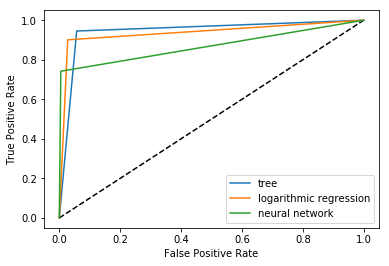

In [127]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive,true_positive,label='tree')
plt.plot(lrfalse_positive,lrtrue_positive,label='logarithmic regression')
plt.plot(nnfalse_positive,nntrue_positive,label='neural network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

In [141]:
info={'Classifier':['tree','log regression','neural network'],
      'Score':[tree_score,lr_score,nn_score],'AUC':[tree_auc,lr_auc,nn_auc]}
metric=pd.DataFrame(info,columns=['Classifier','Score','AUC'])
print(metric)

       Classifier     Score       AUC
0            tree  0.944151  0.944145
1  log regression  0.936441  0.936618
2  neural network  0.867978  0.868605


In [133]:
boost=AdaBoostClassifier(base_estimator=tree,random_state=0)
boost.fit(x_train,y_train)
boost_score=boost.score(x_test,y_test)
boost_auc=roc_auc_score(y_test,boost.predict(x_test))
bfalse_positive, btrue_positive,_=roc_curve(y_test,boost.predict(x_test)) 

In [134]:
ran=RandomForestClassifier(random_state=0).fit(x_train,y_train)
ran_score=ran.score(x_test,y_test)
ran_auc=roc_auc_score(y_test,ran.predict(x_test))
rfalse_positive,rtrue_positive,_=roc_curve(y_test,ran.predict(x_test))

In [135]:
bag=BaggingClassifier(random_state=0).fit(x_train,y_train)
bag_score=bag.score(x_test,y_test)
bag_auc=roc_auc_score(y_test,bag.predict(x_test))
bagfalse_positive,bagtrue_positive,_=roc_curve(y_test,bag.predict(x_test))


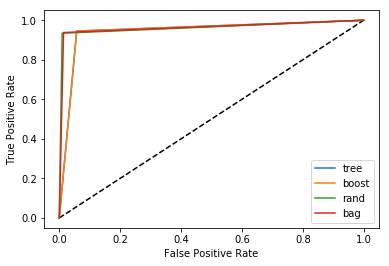

In [136]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(false_positive,true_positive,label='tree')
plt.plot(bfalse_positive,btrue_positive,label='boost')
plt.plot(rfalse_positive,rtrue_positive,label='rand')
plt.plot(bagfalse_positive,bagtrue_positive,label='bag')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')


In [139]:
a={'Classifier':['tree','boost','random','bag'],'Score':[tree_score,boost_score,ran_score,bag_score],
   'AUC':[tree_auc,boost_auc,ran_auc,bag_auc]}
metric2=pd.DataFrame(a,columns=['Classifier','Score','AUC'])

In [140]:
print(metric2)

  Classifier     Score       AUC
0       tree  0.944151  0.944145
1      boost  0.943906  0.943899
2     random  0.962322  0.962462
3        bag  0.961805  0.961924
